## Motivation

When I encounter differential equation solving problems, I find that the most difficult part is solving the equation itself. One efficient but not easily understandable method is the Laplace transform. Therefore, I want to learn how to solve differential equations using the Laplace transform and understand why the Laplace transform works.

## fourier transform 

Before to talk about the Laplace transform, let's talk about the Fourier transform, which is more general form. The Fourier transform of a function $f(t)$ is defined as:

$$
F(\omega) = \int_{-\infty}^\infty e^{-i\omega t} f(t) dt \tag{1}
$$

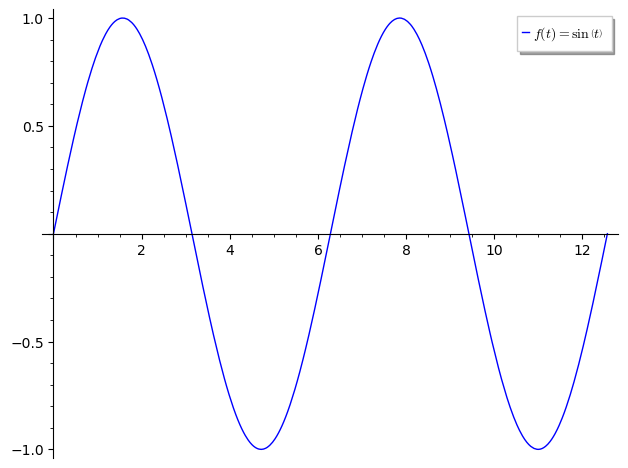

In [1]:
from sage.all import *

# let set the f(t) = sin(t)
t = var("t")
f = sin(t)
plot(f, (t, 0, 4 * pi), color="blue", legend_label=f"$f(t) = {latex(f)}$")

The $e^{-i\omega t}$ is changed by the eulas formula $e^{-i\omega t} = \cos(\omega t) - i\sin(\omega t)$, so the Fourier transform can be written as:

$$  
F(\omega) = \int_{-\infty}^\infty (\cos(\omega t) - i\sin(\omega t)) f(t) dt \tag{2}
$$

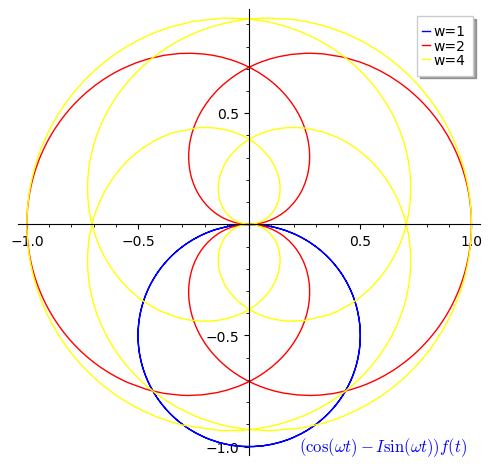

In [2]:
# Import necessary libraries
from sage.all import var, cos, sin, parametric_plot, text, pi

# Define the variable t
t = var("t")

# Define the function f(t)
f = sin(t)  # Assuming f(t) is a predefined function of t


# Define a function to create the parametric plot for a given w
def create_plot(w, color):
    x = cos(w * t) * f
    y = -sin(w * t) * f
    plot = parametric_plot((x, y), (t, 0, 2 * pi), color=color, legend_label=f"w={w}")

    return plot


plot1 = create_plot(1, "blue")
plot2 = create_plot(2, "red")
plot3 = create_plot(4, "yellow")

# Combine the plots
combined_plot = plot1 + plot2 + plot3

combined_plot += text(
    "$(\\cos(\\omega t) - I\\sin(\\omega t)) f(t)$",
    (0.6, -1),
    fontsize=12,
    color="blue",
)

# Show the combined plot
combined_plot.show()

### function of fourier transform
the fourier transform is find **new identify** way to describe the function $f(t)$, which is the frequency domain. The $F(\omega)$ is the **frequency domain representation** of the function $f(t)$.

### limitation of fourier transform

The Fourier transform assumes that the signal is stable and does not grow exponentially. It cannot handle signals that grow **without bound** or are **not absolutely integrable**.

## laplace transform 

### Overview

The Laplace transform of a function $f(t)$ is defined as:

$$
F(s) = \int_0^\infty e^{-st} f(t) dt \tag{3}
$$

The $e^{-st}$ is the exponential decay function, which can handle the signals that grow exponentially. The $s$ is a complex number, which is $s = \sigma + i\omega$. The $\sigma$ is the real part of $s$, and the $\omega$ is the imaginary part of $s$. The $F(s)$ is the **complex frequency domain representation** of the function $f(t)$.

$$
F(\sigma + i\omega) = \int_0^\infty e^{-(\sigma + i\omega)t} f(t) dt \tag{4}
$$

Compare to the Fourier transform, the different between equation (1) and equation (4) is the lower bound of the integral. The Fourier transform is from $-\infty$ to $\infty$, but the Laplace transform is from $0$ to $\infty$. And the laplace have one **exponential decay** part $e^{\sigma}$, which can handle the signals that grow exponentially.

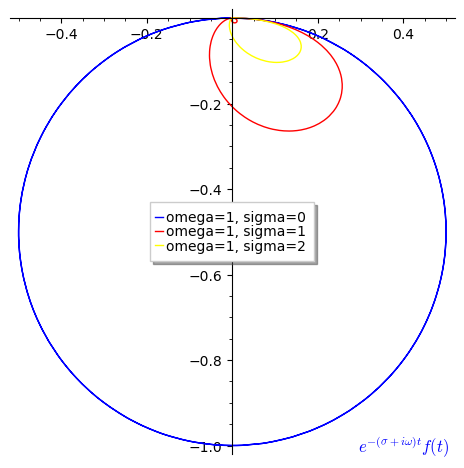

In [22]:
# Import necessary libraries
from sage.all import var, cos, sin, parametric_plot, text, pi

# Define the variable t
t = var("t")

# Define the function f(t)
f = sin(t)  # Assuming f(t) is a predefined function of t


# Define a function to create the parametric plot for a given w
def create_plot(omega, sigma=0, color="blue"):
    x = cos(omega * t) * f * e ** (-sigma * t)
    y = -sin(omega * t) * f * e ** (-sigma * t)
    plot = parametric_plot(
        (x, y),
        (t, 0, 2 * pi),
        color=color,
        legend_label=f"omega={omega}, sigma={sigma}",
    )

    return plot


plot1 = create_plot(1, 0, "blue")
plot2 = create_plot(1, 1, "red")
plot3 = create_plot(1, 2, "yellow")

# Combine the plots
combined_plot = plot1 + plot2 + plot3

combined_plot += text(
    "$e^{-(\\sigma + i\\omega)t} f(t)$",
    (0.4, -1),
    fontsize=12,
    color="blue",
)

# Show the combined plot
combined_plot.show()

### Application

#### Solve differential equations

The Laplace transform can be used to solve differential equations. The Laplace transform of a derivative is:

$$
\begin{aligned}
\mathcal{L}\{f'(t)\} &= sF(s) - f(0)  \\
\mathcal{L}\{f''(t)\} &= s^2F(s) - sf(0) - f'(0) \\
&\cdots
\end{aligned}
$$

let us prove one  equation:

$$
\begin{aligned}
\mathcal{L}\{f'(t)\} &= \int_0^\infty e^{-st} f'(t) dt \\
&= \int_0^\infty e^{-st} \frac{df(t)}{dt} dt \\
&= \int_0^\infty e^{-st} df(t) \\
&= e^{-st} f(t) \Big|_0^\infty - \int_0^\infty -se^{-st} f(t) dt \\
&= -f(0) + s\int_0^\infty e^{-st} f(t) dt \\
&= -f(0) + sF(s)
\end{aligned}
$$

This mean if we have initial conditions, we can quickly solve the differential equations by using the Laplace transform.

Y(S): laplace(y(t), t, s) == (s + 3)/(s^2 + 3*s + 2)


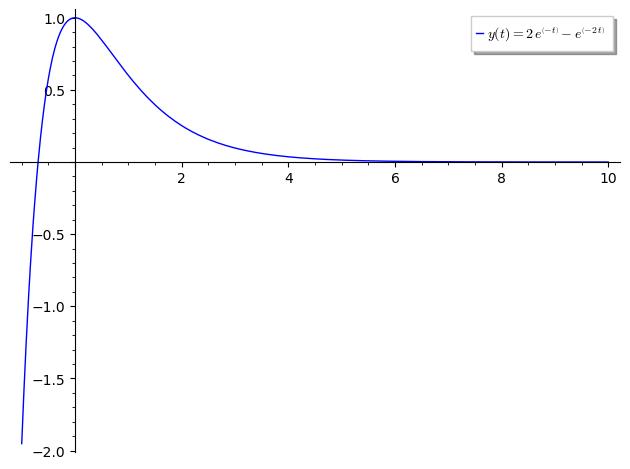

In [66]:
# Laplace Transform solve a differential equation
# Define the variable and the function
t = var("t")
y = function("y")(t)

# Define the differential equation
# y'' + 3y' + 2y = 0
de = diff(y, t, 2) + 3 * diff(y, t) + 2 * y == 0

# Apply Laplace Transform
s = var("s")
Y = laplace(y, t, s)

# Solve using Laplace Transform with initial conditions
# initial conditions: y(0) = 1, y'(0) = 0
sol = solve(
    laplace(de, t, s).subs({laplace(y, t, s): Y, y(t=0): 1, diff(y, t)(t=0): 0}), Y
)
print("Y(S): " + str(sol[0]))
# Find the inverse Laplace Transform to get y(t)
y_t = inverse_laplace(sol[0].rhs(), s, t)
plot(y_t, (t, -1, 10), color="blue", legend_label=f"$y(t) = {latex(y_t)}$")

#### Stability judgement on Control theory

The Laplace transform can be used to determine the stability of a system. The poles of the transfer function are the roots of the denominator of the transfer function. If the real part of the poles is Less than or equal to zero, the system is stable.

One system is represented by the transfer function $G(s)$, which is the Laplace transform of the output divided by the Laplace transform of the input. If the $f(t) = sin(t)$, the Laplace transform of the input is $F(s) = \frac{1}{s^2 + 1}$. The poles of the transfer function are $s = \pm i$ on the left side of the complex plane, so the system is stable.

##### Arithmetics of system transfer function

- **Addition**: $G_1(s) + G_2(s)$, are the transfer functions of two systems connected in parallel.
- **Multiplication**: $G_1(s)G_2(s)$, are the transfer functions of two systems connected in series.

For more detail to see the **Feedback**, we have one system $R(s)$ and $Y(s)$ is system input and output. The transfer function forward path is $G_1(s)$, The transfer function feedback path is $G_2(s)$. 

So the actual input have $R(s)-G_2(s)Y(s)$, we have the output :

$$
\begin{aligned}
Y(s) = G_1(s)(R(s) - G_2(s)Y(s)) \\
Y(s) = \frac{G_1(s)}{1 + G_1(s)G_2(s)}R(s) \\
\end{aligned}
$$

So for closed-loop system, the transfer function is :

$$H(s) =\frac{G_1(s)}{1 + G_1(s)G_2(s)}$$

If we avoid using unstable systems as the basic function, we will never need to use a feedback control system. This means our system will never become unstable.

## FFT

The Fourier transform is a continuous function, but in the real world, we always have discrete data. The Fast Fourier Transform (FFT) is a fast algorithm to calculate the Fourier transform of discrete data. The FFT algorithm is based on the divide-and-conquer strategy, which can reduce the time complexity from $O(n^2)$ to $O(n\log n)$.

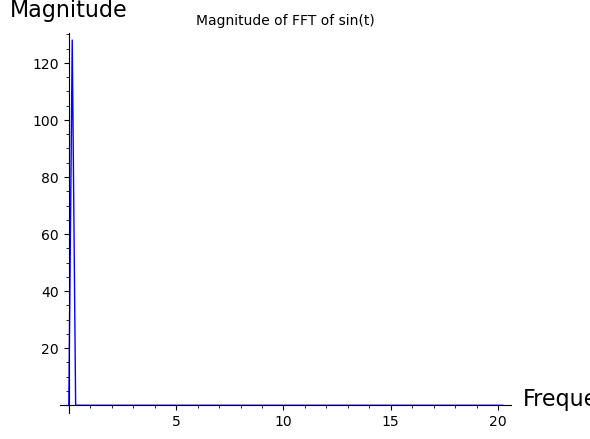

In [13]:
# Import necessary libraries
from sage.all import var, sin, srange, list_plot, pi
from scipy.fft import fft

# Define the variable t
t = var("t")

# Define the function f(t)
f = sin(t)

# Sample the function at discrete points
num_samples = 256
t_values = srange(0, 2 * pi, 2 * pi / num_samples)
f_values = [sin(t_val) for t_val in t_values]  # Direct evaluation of sin(t_val)

# Compute the FFT of the sampled function
F_values = fft(f_values)

# Compute the frequencies corresponding to the FFT values
sampling_rate = 1 / (
    2 * pi / num_samples
)  # Sampling rate based on the sampling interval
frequencies = [n * sampling_rate / num_samples for n in range(num_samples)]

# Plot the magnitude of the FFT (only positive frequencies)
fft_plot = list_plot(
    [(frequencies[i], abs(F_values[i])) for i in range(num_samples // 2)],
    plotjoined=True,
    title="Magnitude of FFT of sin(t)",
    figsize=6,  # Adjust figure size if needed
    axes_labels=["Frequency", "Magnitude"],
)
fft_plot.show()